# Plotting trajectories with colors determined by D_app from State Array analysis of Single Particle Tracks (saspt)

## Imports

In [1]:
# these ones should be part of Anaconda installation
import os
from os.path import join
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import loadmat
import tifffile

import biteen_utilities as bu

## Where is data coming from?

In [2]:
locs_fname = r"T:\MIGRATED\Lab_Members\Daniel_Foust\Data\State Arrays\Lauren\230213_cwx2695_2_5hr_001_AccBGSUB_fits_sa.csv"
# image_fname = r # for phase image or other
masks_fname = r"T:\MIGRATED\Lab_Members\Daniel_Foust\Data\State Arrays\Lauren\230213_cwx2695_2_5hr_001_PhaseMask.mat"

save_fname = join(os.getcwd(), f"{Path(locs_fname).stem}_trajectories.png")
save_folder = Path(save_fname).parent
os.makedirs(save_folder, exist_ok=True)

## Parameters

In [8]:
# experiment parameters
pixel_size_um = 0.049

# filtering tracks by number of localizations
min_locs = -np.inf
max_locs = np.inf

# how to find data
coord_cols = ('col-1', 'row-1')
track_col = 'track_id_unique' # for locs_df?
color_col = 'Dapp' # for track_data?

# where to divide for different colors
track_data_bins = np.array([
    [-np.inf, 0.05],
    [0.05, np.inf]
])

# hot to plot
track_data_colors = ('xkcd:bright cyan', 'xkcd:hot magenta')
order = 'reverse'

num_tracks_to_plot = 10

separate = False
subsample = None # set to integer to randomly plot subset of trajectories
crop = False # if True, will crop to area immediately surrounding rois

figure_props = {} # for changing figsize, for example

line_props = {'alpha': 1} # trajectory lines

outline_props = { # outlines of masked regions
    'lw': 1
}
outline_smooth_factor = 0.5

scalebar_props = {
    'dx': pixel_size_um,
    'units': 'um',
    'fixed_value': 2,
    'scale_loc': 'none',
    'location': 'lower right',
    'frameon': False,
    'color': 'xkcd:white'
}

## Preparing data

### Read data

In [9]:
locs_df = pd.read_csv(locs_fname, index_col=0)
# image = tifffile.imread(image_fname)
masks = loadmat(masks_fname)['PhaseMask']

### Preparing data

In [10]:
# filter by track length
locs_df = bu.filter_by_nlocs(locs_df, min_locs=min_locs, max_locs=max_locs)
locs_df = locs_df.drop(columns=['level_0'])

# convert matlab to python indexing
locs_df['col-1'] = locs_df['col'] - 1
locs_df['row-1'] = locs_df['row'] - 1

# remove localizations not used in state array calculation
locs_df = locs_df[~np.isnan(locs_df['track_id_SA'])]

# compute track-level data
track_data = pd.DataFrame(
    data = {'track_id_unique': locs_df['track_id_unique'].unique(),
            'Dapp': [locs_df[locs_df['track_id_unique']==track_id]['D_av'].mean() for track_id in locs_df['track_id_unique'].unique()]}
)

## Plotting

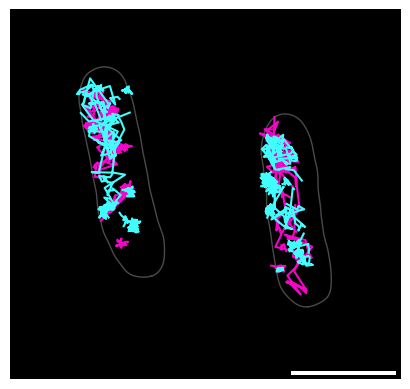

In [11]:
fig, ax = bu.plot_tracks(
    locs_df,
    track_data = track_data,
    coord_cols = coord_cols,
    track_col = track_col,
    color_col = color_col,
    track_data_bins = track_data_bins,
    track_data_colors = track_data_colors,
    order = order,
    scale = 1, # units are already pixels
    labels = masks,
    # image = None, 
    subsample = subsample,
    line_props = line_props,
    separate = separate,
    crop = crop,
    figure_props = figure_props,
    scalebar_props = scalebar_props,
    outline_props = outline_props,
    outline_smooth_factor = outline_smooth_factor
    )

## Saving

In [7]:
fig.savefig(save_fname,
            transparent=True,
            bbox_inches='tight',
            dpi=300)
print(f"Figure saved as {save_fname}.")

Figure saved as c:\Users\djfoust\Documents\Python Scripts\plot_trajectories\230213_cwx2695_2_5hr_001_AccBGSUB_fits_sa_trajectories.png.
